1. https://stackoverflow.com/questions/71442585/adjusting-pytesseract-parameters
2. https://ithelp.ithome.com.tw/articles/10210214
3. https://python-bloggers.com/2022/05/extract-text-from-image-using-python/
4. (tabula) https://aegis4048.github.io/parse-pdf-files-while-retaining-structure-with-tabula-py
5. https://stackoverflow.com/questions/34837707/how-to-extract-text-from-a-pdf-file
6. https://www.geeksforgeeks.org/extract-text-from-pdf-file-using-python/
7. https://towardsdatascience.com/how-to-extract-text-from-pdf-245482a96de7
8. https://towardsdatascience.com/extracting-text-from-scanned-pdf-using-pytesseract-open-cv-cd670ee38052
9. https://betterprogramming.pub/efficiently-convert-pdf-to-png-or-jpeg-images-in-python-50c5ce224c20
10. https://pdf.wondershare.com/pdf-knowledge/pdf-to-png-python.html
11. https://github.com/tesseract-ocr/tesseract
12. https://vimsky.com/zh-tw/examples/usage/python-opencv-cv2-cvtcolor-method.html
13. https://pdf2image.readthedocs.io/en/latest/reference.html
14. (Need Java) https://products.aspose.com/cells/python-java/conversion/jpg-to-excel/
15. https://ithelp.ithome.com.tw/articles/10245342
16. https://blog.csdn.net/hxxjxw/article/details/117961339
17. https://dotblogs.com.tw/CYLcode/2020/03/12/111420
18. https://ithelp.ithome.com.tw/users/20120424/ironman/3642
19. https://blog.gtwang.org/programming/opencv-drawing-functions-tutorial/
20. https://splunktool.com/pandas-dataframe-select-multiple-discontinuous-columnsslices
21. https://ithelp.ithome.com.tw/articles/10240032
22. https://ithelp.ithome.com.tw/articles/10246927
23. https://steam.oxxostudio.tw/category/python/basic/try-except.html
24. https://openhome.cc/zh-tw/python/exception/try-except/
25. https://pypi.org/project/pytesseract/
26. https://lufor129.medium.com/opencv圖片處理整理-緩慢更新-b45e248d14bb
27. https://medium.com/jimmy-wang/opencv-基礎教學筆記-with-python-d780f571a57a
28. https://livezingy.com/pytesseract-image_to_data_locate_text/
29. https://pypi.org/project/pytesseract/
30. https://weirenxue.github.io/2021/06/12/python_cp950_codec_cant_encode/
31. https://stackoverflow.com/questions/5214578/print-string-to-text-file
32. https://stackoverflow.com/questions/33279940/how-to-combine-multiple-rows-of-strings-into-one-using-pandas
33. https://d246810g2000.medium.com/文字辨識方法統整-1e3d3ba5fe54
34. 
35. 

# Import Libraries

In [51]:
import pandas as pd
import numpy as np
from glob import glob
import math
import os
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
import cv2
import pytesseract
from pdf2image import convert_from_path  # Faster way if using Anaconda: conda install -c conda-forge poppler
# import PyPDF2
# from PyPDF2 import PdfFileReader
# from PIL import Image
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# pytesseract.pytesseract.tesseract_cmd = r'\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'

# Convert PDFs to Images (JPGs)

In [26]:
for pdf_file in glob("*.pdf"):
    folder_name = pdf_file.split(".")[0]
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
#     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG"):
#         os.mkdir('kickoff_'+str(i)+"_Edit/JPG")

    print("Converting "+pdf_file+"......")
    pages = convert_from_path(pdf_file, dpi=400)
    print("Converting "+pdf_file+" Done!")
    
    print("Saving Images of "+pdf_file+"......")
    for ind, page in enumerate(pages):
        page.save(folder_name+'/Page_'+str(ind+1)+'.jpg', 'JPEG')
    print("Saving Images of "+pdf_file+" Done!")
    print()

Converting Certificate of Degree.pdf......
Converting Certificate of Degree.pdf Done!
Saving Images of Certificate of Degree.pdf......
Saving Images of Certificate of Degree.pdf Done!

Converting Transcripts.pdf......
Converting Transcripts.pdf Done!
Saving Images of Transcripts.pdf......
Saving Images of Transcripts.pdf Done!



# Image Recognition V01

In [2]:
# def get_cv2_img1(img_path):
#     img = cv2.imread(img_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # COLOR_BGR2GRAY、COLOR_BGR2HSV
#     img_blur = cv2.GaussianBlur(gray, (3,3), 0)
#     _,thresh = cv2.threshold(img_blur, 200, 255, cv2.THRESH_BINARY_INV)
#     return [img, gray, img_blur, thresh]

### Pre-Processing
def get_cv2_img1(img_path):
    img = cv2.imdecode(np.fromfile(img_path,dtype=np.uint8),-1)[100:1700, 50:2550-50]
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img_gray

def remove_space(x):
    if x.strip() == "" or x.strip() == "nan":
        return np.nan
    else:
        return x

### Read Text from Image
def image_recognition1(img_path):
    text = pytesseract.image_to_data(get_cv2_img1(img_path), lang='eng', output_type="data.frame")
    text["text"] = text["text"].astype(str).apply(lambda x: remove_space(x))
    text = text.dropna(how="any").reset_index(drop=True)
    text["text"] = text["text"].apply(lambda x: x.replace(",","").replace(":",""))
    return text

In [8]:
# for i in [1, 2, 3, 4]:
#     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG/Converted"):
#         os.mkdir('kickoff_'+str(i)+"_Edit/JPG/Converted")
#     print("Image recognition "+str(i)+"......")
#     for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/*.jpg"):
#         image_recog_df = image_recognition1(image_path)
#         df_name = image_path.split(".")[0].split("\\")[-1]
#         image_recog_df.to_excel('kickoff_'+str(i)+"_Edit/JPG/Converted/"+df_name+".xlsx", index=False)
#     print("Image recognition "+str(i)+" Done!")

# Image Recognition V02

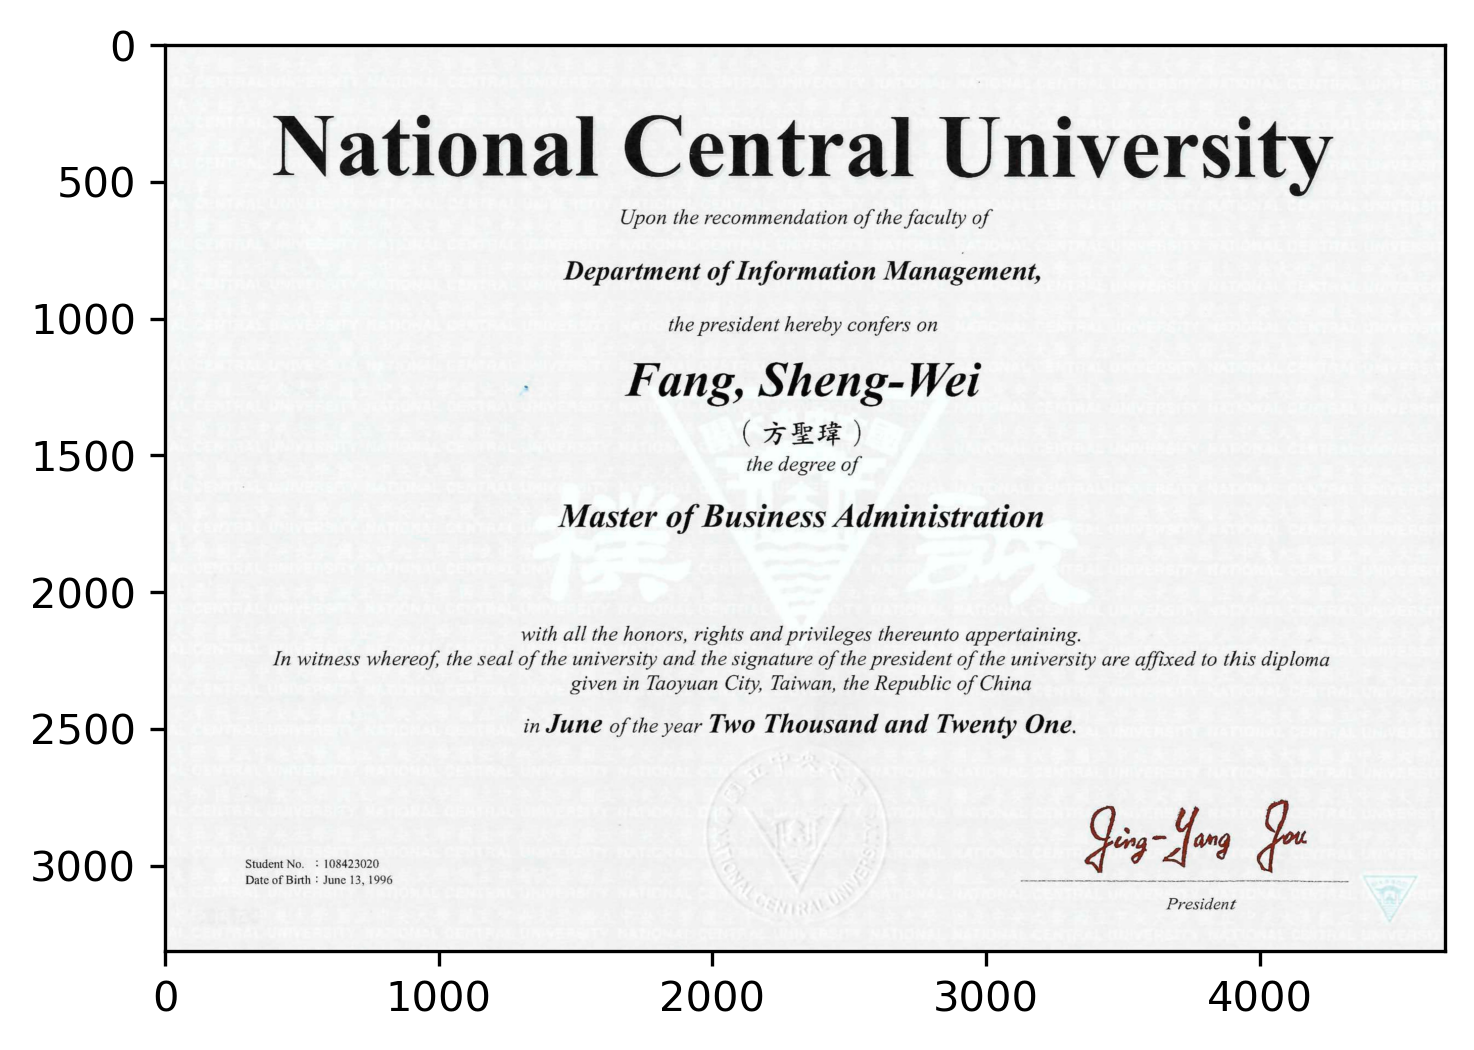

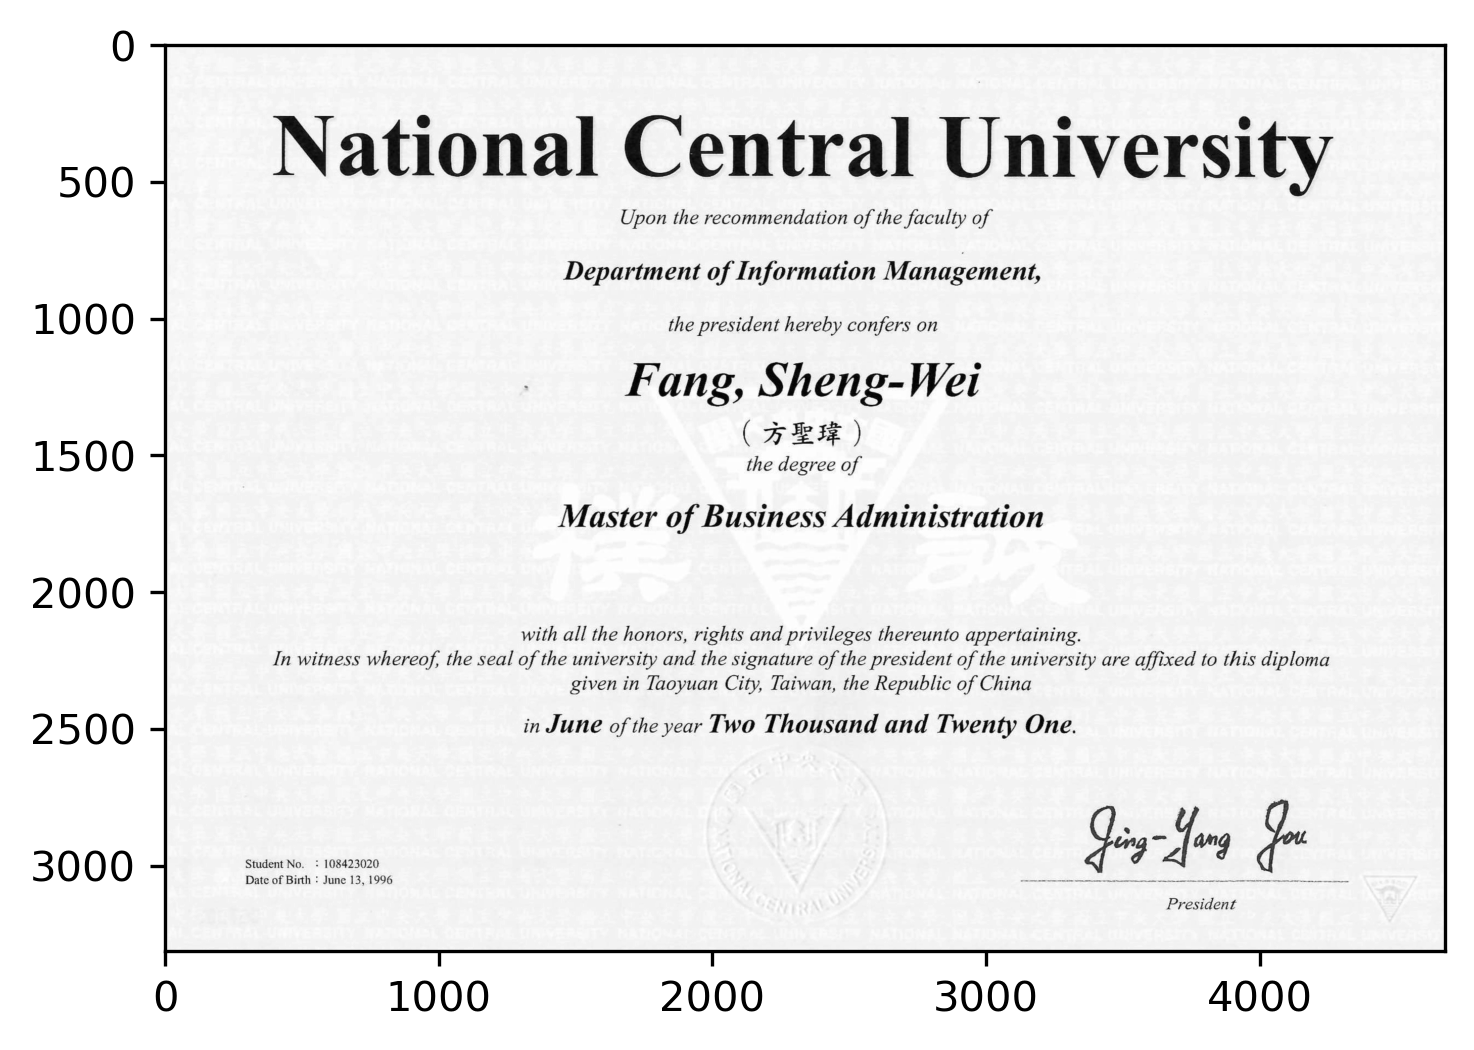

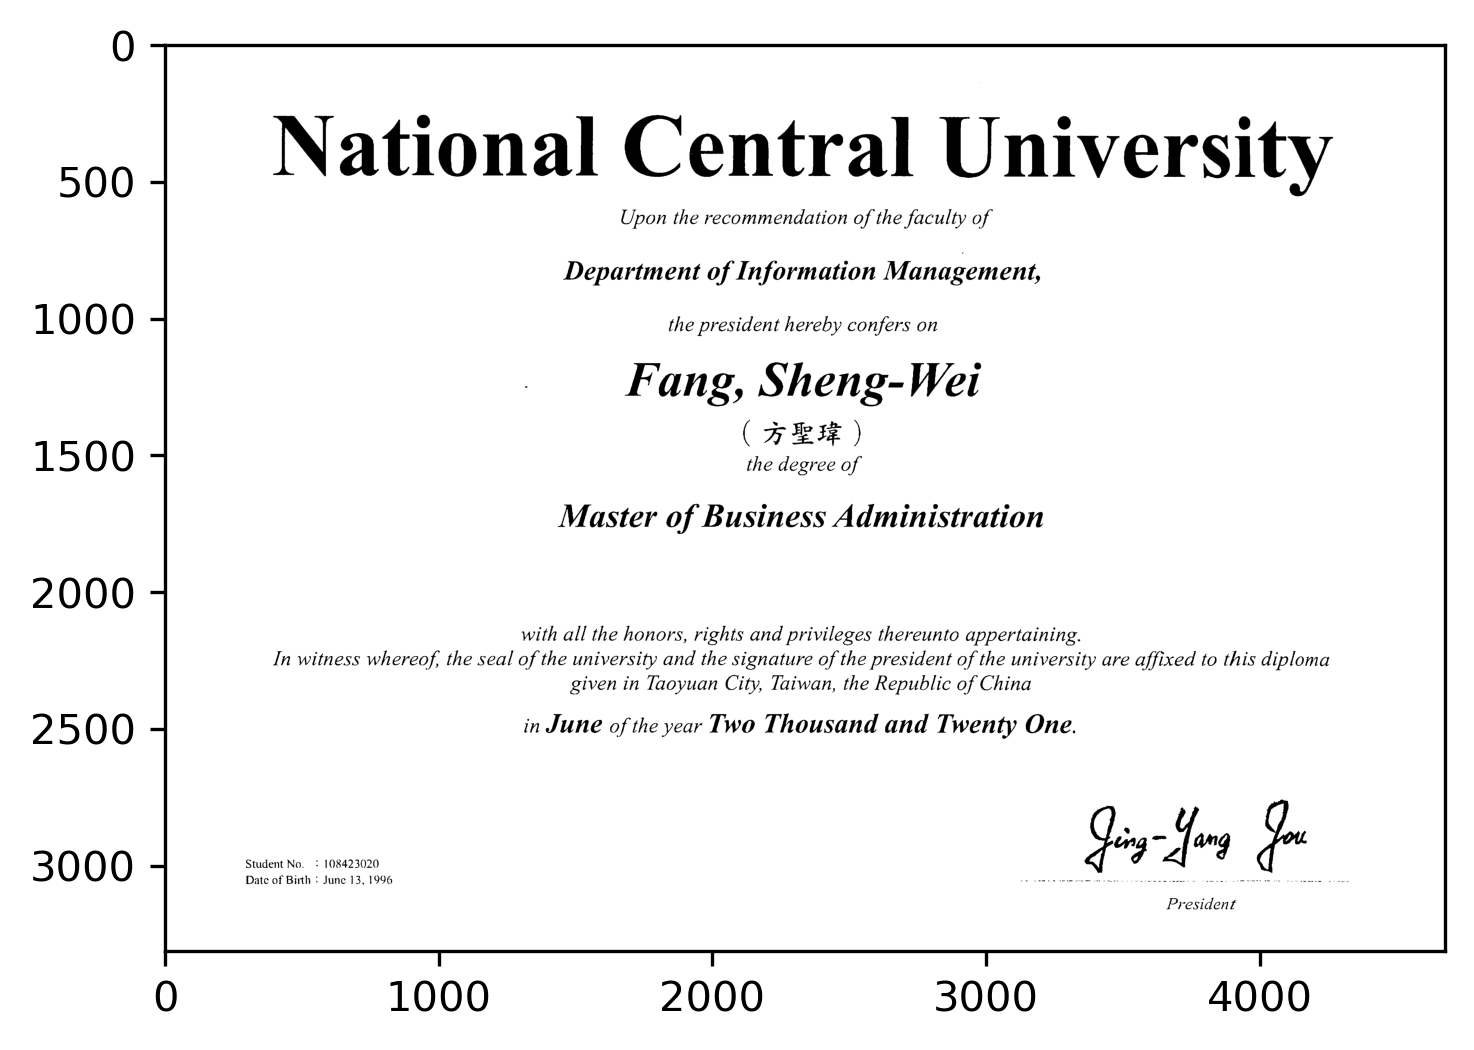

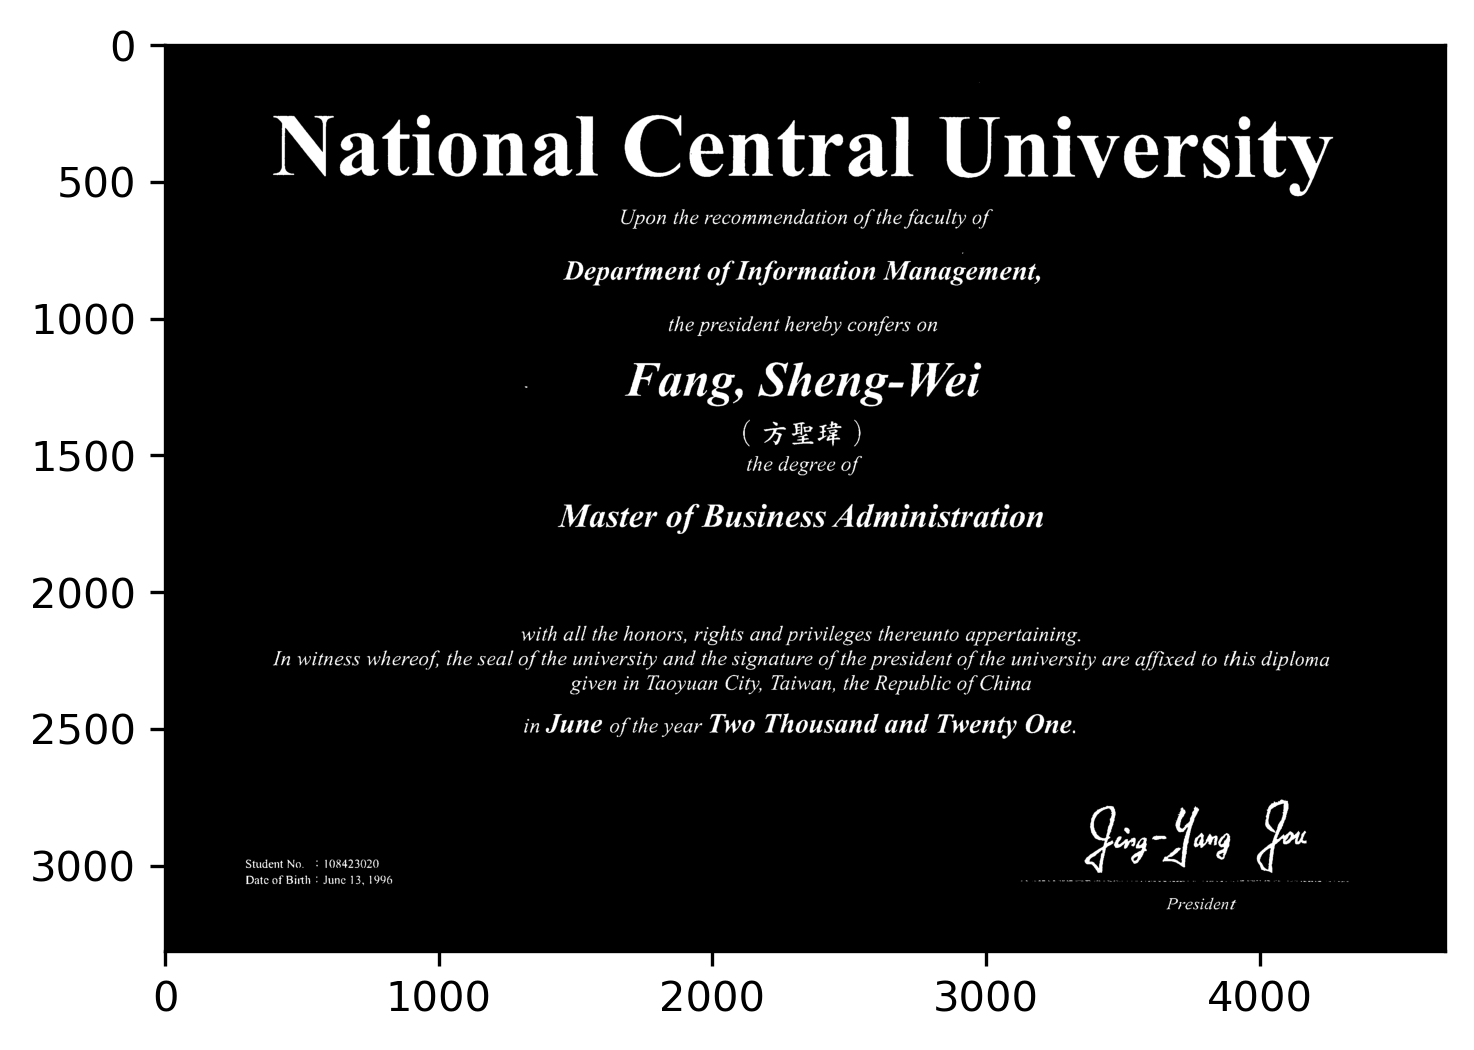

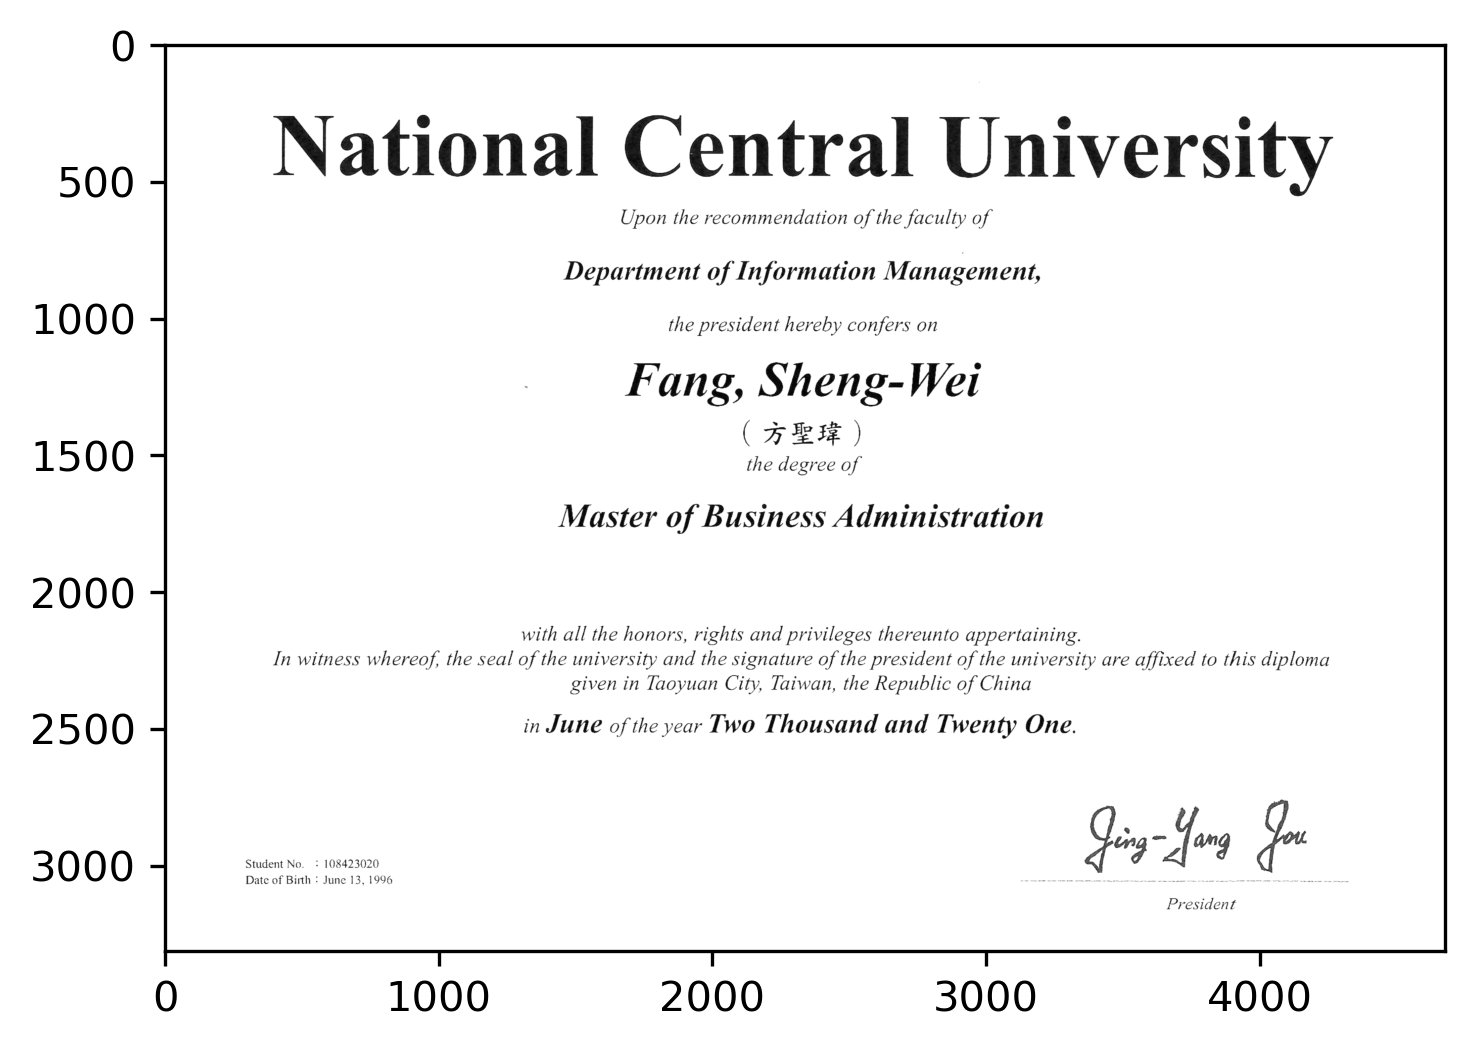

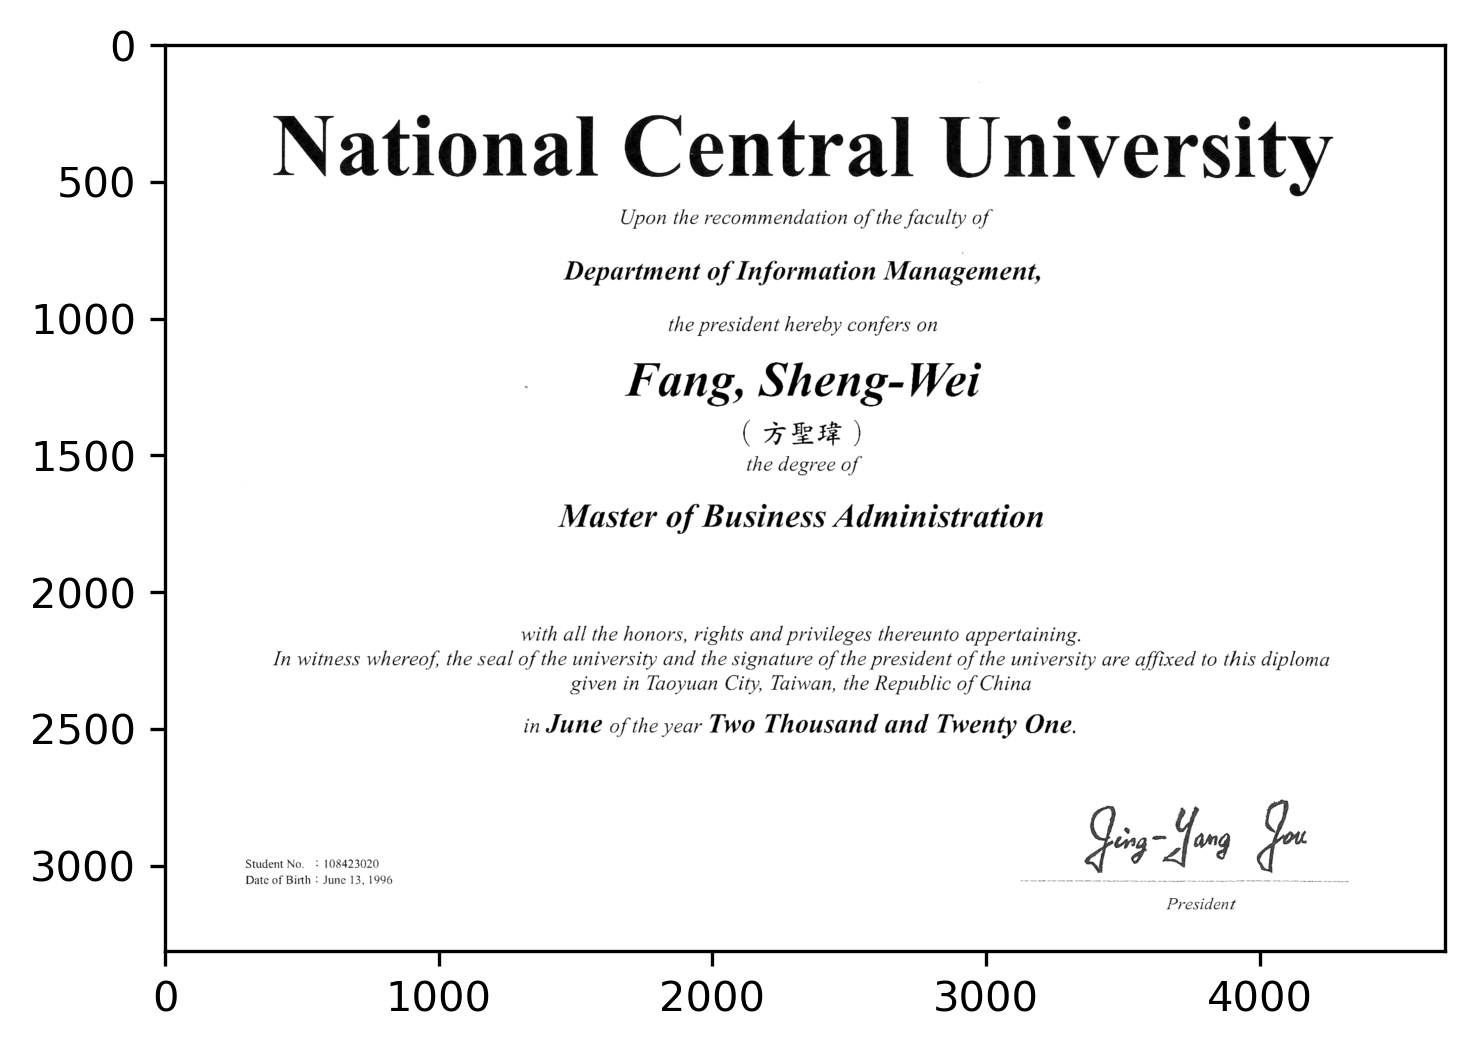

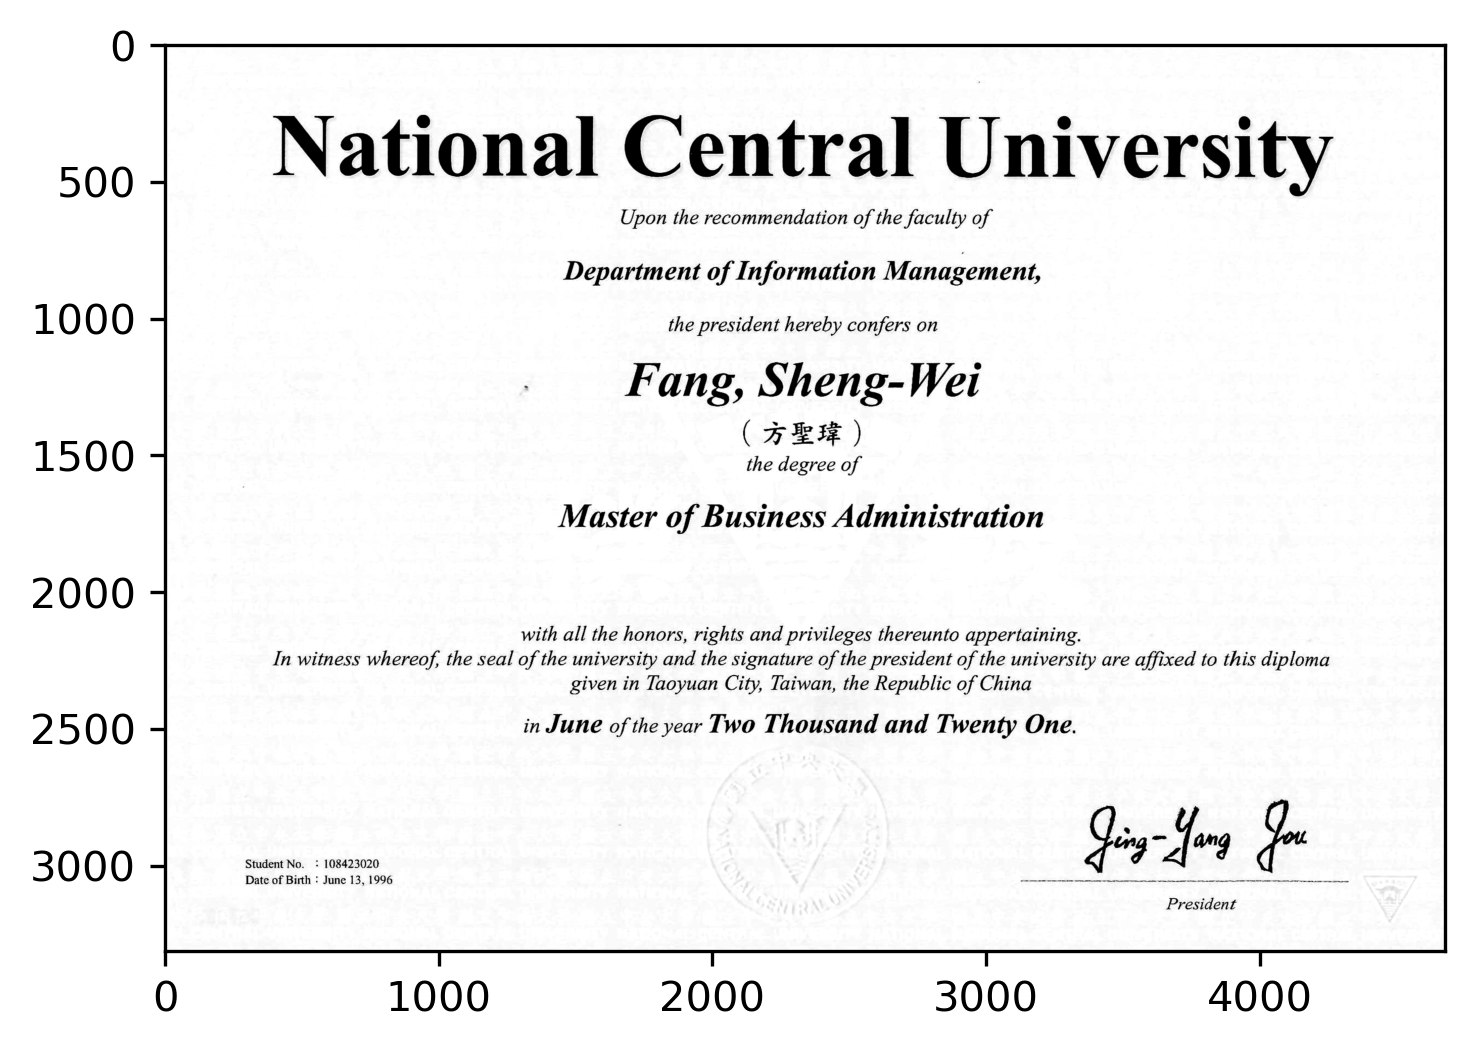

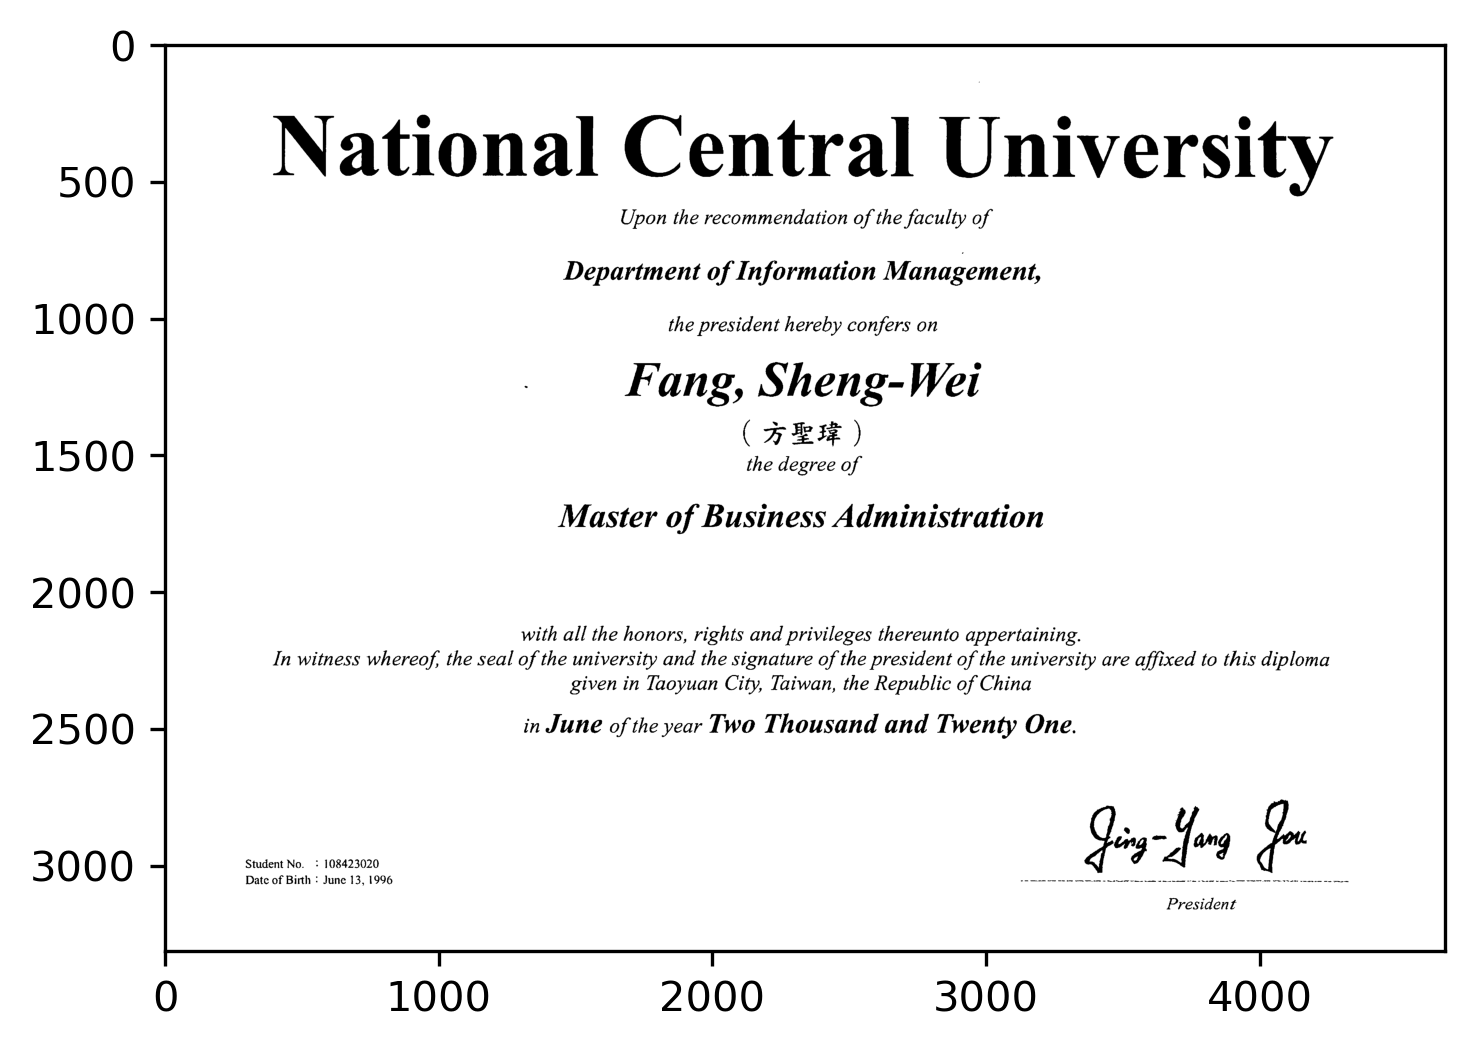

In [52]:
### Pre-Processing
def modify_contrast_and_brightness1(img, brightness=0 , contrast=100):
#     brightness = 0
#     contrast = +100 # - 減少對比度/+ 增加對比度
    B = brightness / 255.0
    c = contrast / 255.0 
    k = math.tan((45 + 44 * c) / 180 * math.pi)
    img = (img - 127.5 * (1 - B)) * k + 127.5 * (1 + B)
    # 所有值必須介於 0~255 之間，超過255 = 255，小於 0 = 0
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

def get_cv2_img2(img_path, method_num=1):
#     img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8),-1)[100:1700, 50:2550-50]
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    if method_num == 0: # Method 0: 原圖
        return img
    
    elif method_num == 1: # Method 1: 原圖轉灰階
        return img_gray
    
    elif method_num == 2: # Method 2: 原圖轉灰階 + 極致黑白轉化（黑轉極致黑、白轉極致白）
        ret, img_gray = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
        return img_gray
    
    elif method_num == 3: # Method 3: 原圖轉灰階 + 極致黑白轉化（黑轉極致白、白轉極致黑）
        ret, img_gray = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
        return img_gray
    
    elif method_num == 4: # Method 4: 原圖轉灰階 + 調高亮度&高對比（1調）
        img_gray = modify_contrast_and_brightness1(img_gray, brightness=45, contrast=35)
        return img_gray
    
    elif method_num == 5: # Method 5: 原圖轉灰階 + 調高亮度&高對比（2調）
        img_gray = modify_contrast_and_brightness1(img_gray, brightness=25, contrast=50)
        return img_gray

    elif method_num == 6: # Method 6: 原圖轉灰階 + 調低亮度&高對比（3調）
        img_gray = modify_contrast_and_brightness1(img_gray, brightness=-35, contrast=60)
        return img_gray

    elif method_num == 7: # Method 7: 原圖轉灰階 + 調低亮度&高對比（3調） + 極致黑白轉化（黑轉極致黑、白轉極致白）
        img_gray = modify_contrast_and_brightness1(img_gray, brightness=-35, contrast=60)
        ret, img_gray = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
        return img_gray
    
def remove_space(x):
    if x.strip() == "" or x.strip() == "nan":
        return np.nan
    else:
        return x

### Read Text from Image
def image_recognition2(img_path, n=1):
    text = pytesseract.image_to_data(get_cv2_img2(img_path, method_num=n), lang="eng+chi_tra", output_type="data.frame")
    text["text"] = text["text"].astype(str).apply(lambda x: remove_space(x))
    text = text.dropna(how="any").reset_index(drop=True)
#     text["text"] = text["text"].apply(lambda x: x.replace(",","").replace(":","").strip("_").strip("—"))
    text = text[text["text"]!=""].reset_index(drop=True)
    text = text[text["text"]!="|"].reset_index(drop=True)
    return text

def image_recognition_data_transform1(text):
#     try:
#         i1_1 = text[text["text"]=="Project"].index[0]
#     except:
#         try:
#             i1_1 = text[text["text"]=="Kick-Off"].index[0]
#         except:
#             i1_1 = 0
        
#     try:
#         i1_2 = text[text["text"].str.contains("Riser")].index[0]
#     except:
#         try:
#             i1_2 = text[text["text"]=="Cost"].index[0]
#         except:
#             print("Not a good method for this image")
#             return pd.DataFrame()
#     try:
#         i2_1 = text[text["text"].str.contains("BOM")].index[0]
#     except:
#         i2_1 = i1_2
        
#     try:
#         i2_2 = text[text["text"]=="Niche"].index[-1]
#     except:
#         try:
#             i2_2 = text[text["text"]=="Advantages"].index[-1]
#         except:
#             i2_2 = len(text)-1
        
#     text = pd.concat([text[i1_1+1:i1_2+1], text[i2_1+1:i2_2+1]])
    return text.drop_duplicates(keep='last')

def image_recognition_data_transform_text1(text):
    text_string = ""
    for i in set(text["block_num"]):
        for j in set(text["line_num"]):
            text_string += text[(text["block_num"]==i) & 
                                (text["line_num"]==j)]["text"].str.cat(sep=' ') + "\n"
    return text_string

def image_recognition_choose_best1(text_list):
    text_list = [text for text in text_list if len(text)!=0]
    best_conf = -0.0001
    best_text = pd.DataFrame()
    for text in text_list:
        text_conf = np.mean(text[(text["width"]>200) & (text["width"]<350)]["conf"])
        if text_conf>best_conf:
            best_conf = text_conf
            best_text = text
    if len(best_text)==0:
        for text in text_list:
            text_conf = np.mean(text[(text["width"]>150) & (text["width"]<350)]["conf"])
            if text_conf>best_conf:
                best_conf = text_conf
                best_text = text
    return best_text



tmp_path = "Certificate of Degree\Page_1.jpg"

plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,0), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,1), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,2), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,3), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,4), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,5), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,6), cmap="gray")
plt.figure(dpi=300)
plt.imshow(get_cv2_img2(tmp_path,7), cmap="gray")

In [31]:
# # for i in [5]:
# for i in range(1, 15+1):
#     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_3"):
#         os.mkdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_3")
#     print("Image recognition "+str(i)+"......")
    
#     with pd.ExcelWriter('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/Kickoff_"+str(i)+".xlsx") as writer:
        
#         # 面對無螢光筆畫過（舊版介面）：使用0、1、6、7
#         for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/Unmarked/*.jpg"):
#             image_recog_df_list = [image_recognition_data_transform1(image_recognition2(image_path, 0)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 1)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 6)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 7))]
#             image_recog_df = image_recognition_choose_best1(image_recog_df_list)
#             with open('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/"+image_path.split("\\")[-1].split(".")[0]+".txt", "w", encoding='UTF-8') as text_file:
#                 text_file.write(image_recognition_data_transform_text1(image_recog_df))
#             image_recog_df.to_excel(writer, sheet_name=image_path.split("\\")[-1].split(".")[0], index=False)
        
#         # 面對無螢光筆畫過（新版介面）：使用0、1、2、3、4、5、6、7
#         for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/New/*.jpg"):
#             image_recog_df_list = [image_recognition_data_transform1(image_recognition2(image_path, 0)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 1)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 2)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 3)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 4)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 5)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 6)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 7))]
#             image_recog_df = image_recognition_choose_best1(image_recog_df_list)
#             with open('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/"+image_path.split("\\")[-1].split(".")[0]+".txt", "w", encoding='UTF-8') as text_file:
#                 text_file.write(image_recognition_data_transform_text1(image_recog_df))
#             image_recog_df.to_excel(writer, sheet_name=image_path.split("\\")[-1].split(".")[0], index=False)
        
#         # 面對有螢光筆畫過（無論新舊）：使用2、3、4、5、6、7
#         for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/Marked/*.jpg"):
#             image_recog_df_list = [image_recognition_data_transform1(image_recognition2(image_path, 2)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 3)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 4)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 5)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 6)), 
#                                    image_recognition_data_transform1(image_recognition2(image_path, 7))]
#             image_recog_df = image_recognition_choose_best1(image_recog_df_list)
#             with open('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/"+image_path.split("\\")[-1].split(".")[0]+".txt", "w", encoding='UTF-8') as text_file:
#                 text_file.write(image_recognition_data_transform_text1(image_recog_df))
#             image_recog_df.to_excel(writer, sheet_name=image_path.split("\\")[-1].split(".")[0], index=False)
        
        
#     print("Image recognition "+str(i)+" Done!")

In [34]:
t = []
for i in range(0,7+1,1):
    t.append(image_recognition_data_transform1(image_recognition2(tmp_path,i)))

In [41]:
# Methods比較
for i, tt in enumerate(t):
    try:
#         print("Method "+str(i)+": ", np.round(np.mean(tt[(tt["width"]>200) & (tt["width"]<350)]["conf"]), 2))
        print("Method "+str(i)+": ", np.round(np.mean(tt[(tt["width"]>100) & (tt["width"]<350)]["conf"]), 2))
    except:
        print("Method "+str(i)+": Not a good method for this image")

Method 0:  94.56
Method 1:  95.33
Method 2:  92.33
Method 3:  90.96
Method 4:  92.52
Method 5:  92.94
Method 6:  92.73
Method 7:  94.44


In [42]:
# Method 0: 原圖
# print(np.mean(t0[(t0["width"]>200) & (t0["width"]<350)]["conf"])) # 350
t[0]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       5         1          1        1         1         1   395   255   
1       5         1          1        1         1         2  1680   256   
2       5         1          1        1         1         3  2830   260   
3       5         1          2        1         1         1  1667   601   
4       5         1          2        1         1         2  1859   600   
5       5         1          2        1         1         3  1972   599   
6       5         1          2        1         1         4  2518   599   
7       5         1          2        1         1         5  2600   599   
8       5         1          2        1         1         6  2701   599   
9       5         1          2        1         1         7  2952   600   
10      5         1          3        1         1         1  1455   790   
11      5         1          3        1         1         2  1983   788   
12      5         1          3        1         1         3  2085   788   
13      5         1          3        1         1         4  2623   754   
14      5         1          4        1         1         1  1842   991   
15      5         1          4        1         1         2  1944   991   
16      5         1          4        1         1         3  2265   991   
17      5         1          4        1         1         4  2494   991   
18      5         1          4        1         1         5  2750  1011   
19      5         1          5        1         1         1  1680  1163   
20      5         1          5        1         1         2  2167  1159   
21      5         1          6        1         1         1  2113  1370   
22      5         1          6        1         1         2  2212  1377   
23      5         1          6        1         1         3  2326  1379   
24      5         1          6        1         1         4  2429  1376   
25      5         1          6        1         1         5  2518  1370   
26      5         1          6        1         2         1  2127  1502   
27      5         1          6        1         2         2  2243  1503   
28      5         1          6        1         2         3  2472  1502   
29      5         1          7        1         1         1  1435  1680   
30      5         1          7        1         1         2  1832  1677   
31      5         1          7        1         1         3  1959  1677   
32      5         1          7        1         1         4  2436  1677   
33      5         1          8        1         1         1  1302  2123   
34      5         1          8        1         1         2  1457  2123   
35      5         1          8        1         1         3  1562  2123   
36      5         1          8        1         1         4  1676  2123   
37      5         1          8        1         1         5  1935  2123   
38      5         1          8        1         1         6  2139  2123   
39      5         1          8        1         1         7  2268  2123   
40      5         1          8        1         1         8  2608  2123   
41      5         1          8        1         1         9  2927  2129   
42      5         1          8        1         2         1   394  2215   
43      5         1          8        1         2         2   484  2219   
44      5         1          8        1         2         3   737  2213   
45      5         1          8        1         2         4  1031  2213   
46      5         1          8        1         2         5  1141  2213   
47      5         1          8        1         2         6  1293  2213   
48      5         1          8        1         2         7  1376  2213   
49      5         1          8        1         2         8  1492  2217   
50      5         1          8        1         2         9  1821  2213   
51      5         1          8        1         2        10  1961  2213   
52      5         1          

In [43]:
# Method 1: 原圖轉灰階
# print(np.mean(t1[(t1["width"]>200) & (t1["width"]<350)]["conf"])) # 350
t[1]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       5         1          1        1         1         1   395   255   
1       5         1          1        1         1         2  1680   256   
2       5         1          1        1         1         3  2830   260   
3       5         1          2        1         1         1  1667   601   
4       5         1          2        1         1         2  1859   600   
5       5         1          2        1         1         3  1972   599   
6       5         1          2        1         1         4  2518   599   
7       5         1          2        1         1         5  2600   599   
8       5         1          2        1         1         6  2701   599   
9       5         1          2        1         1         7  2952   600   
10      5         1          3        1         1         1  1455   790   
11      5         1          3        1         1         2  1983   788   
12      5         1          3        1         1         3  2085   788   
13      5         1          3        1         1         4  2623   754   
14      5         1          4        1         1         1  1842   991   
15      5         1          4        1         1         2  1944   991   
16      5         1          4        1         1         3  2265   991   
17      5         1          4        1         1         4  2494   991   
18      5         1          4        1         1         5  2750  1011   
19      5         1          5        1         1         1  1680  1163   
20      5         1          5        1         1         2  2168  1159   
21      5         1          6        1         1         1  2113  1370   
22      5         1          6        1         1         2  2212  1377   
23      5         1          6        1         1         3  2326  1379   
24      5         1          6        1         1         4  2429  1376   
25      5         1          6        1         1         5  2518  1370   
26      5         1          6        1         2         1  2127  1502   
27      5         1          6        1         2         2  2243  1503   
28      5         1          6        1         2         3  2472  1502   
29      5         1          7        1         1         1  1435  1680   
30      5         1          7        1         1         2  1832  1677   
31      5         1          7        1         1         3  1959  1677   
32      5         1          7        1         1         4  2436  1677   
33      5         1          8        1         1         1  1302  2123   
34      5         1          8        1         1         2  1457  2123   
35      5         1          8        1         1         3  1562  2123   
36      5         1          8        1         1         4  1676  2123   
37      5         1          8        1         1         5  1935  2123   
38      5         1          8        1         1         6  2139  2123   
39      5         1          8        1         1         7  2268  2123   
40      5         1          8        1         1         8  2608  2123   
41      5         1          8        1         1         9  2927  2129   
42      5         1          8        1         2         1   394  2215   
43      5         1          8        1         2         2   484  2219   
44      5         1          8        1         2         3   737  2213   
45      5         1          8        1         2         4  1031  2213   
46      5         1          8        1         2         5  1141  2213   
47      5         1          8        1         2         6  1293  2213   
48      5         1          8        1         2         7  1376  2213   
49      5         1          8        1         2         8  1492  2217   
50      5         1          8        1         2         9  1821  2213   
51      5         1          8        1         2        10  1961  2213   
52      5         1          

In [44]:
# Method 2: 原圖轉灰階 + 極致黑白轉化（黑轉極致黑、白轉極致白）
# print(np.mean(t2[(t2["width"]>200) & (t2["width"]<350)]["conf"])) # 350
t[2]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        5         1          1        1         1         1   395   255   
1        5         1          1        1         1         2  1680   256   
2        5         1          1        1         1         3  2830   260   
3        5         1          2        1         1         1  1668   602   
4        5         1          2        1         1         2  1859   600   
5        5         1          2        1         1         3  1973   600   
6        5         1          2        1         1         4  2518   599   
7        5         1          2        1         1         5  2600   600   
8        5         1          2        1         1         6  2701   600   
9        5         1          2        1         1         7  2952   600   
10       5         1          3        1         1         1  1455   790   
11       5         1          3        1         1         2  1983   788   
12       5         1          3        1         1         3  2085   788   
13       5         1          3        1         1         4  2624   754   
14       5         1          4        1         1         1  1842   992   
15       5         1          4        1         1         2  1945   991   
16       5         1          4        1         1         3  2265   991   
17       5         1          4        1         1         4  2495   991   
18       5         1          4        1         1         5  2750  1011   
19       5         1          5        1         1         1  1680  1163   
20       5         1          5        1         1         2  2168  1160   
21       5         1          6        1         1         1  2113  1370   
22       5         1          6        1         1         2  2212  1377   
23       5         1          6        1         1         3  2385  1388   
24       5         1          6        1         1         4  2437  1376   
25       5         1          6        1         2         1  2127  1503   
26       5         1          6        1         2         2  2243  1503   
27       5         1          6        1         2         3  2472  1502   
28       5         1          7        1         1         1  1435  1680   
29       5         1          7        1         1         2  1832  1677   
30       5         1          7        1         1         3  1960  1678   
31       5         1          7        1         1         4  2436  1677   
32       5         1          8        1         1         1  1302  2123   
33       5         1          8        1         1         2  1457  2123   
34       5         1          8        1         1         3  1562  2123   
35       5         1          8        1         1         4  1676  2123   
36       5         1          8        1         1         5  1935  2123   
37       5         1          8        1         1         6  2139  2123   
38       5         1          8        1         1         7  2268  2123   
39       5         1          8        1         1         8  2608  2123   
40       5         1          8        1         1         9  2927  2129   
41       5         1          8        1         2         1   394  2216   
42       5         1          8        1         2         2   484  2219   
43       5         1          8        1         2         3   737  2213   
44       5         1          8        1         2         4  1031  2213   
45       5         1          8        1         2         5  1142  2213   
46       5         1          8        1         2         6  1293  2213   
47       5         1          8        1         2         7  1377  2213   
48       5         1          8        1         2         8  1492  2218   
49       5         1          8        1         2         9  1822  2213   
50       5         1          8        1         2        10  1961  2213   
51       5         1          8        1         2   

In [45]:
# Method 3: 原圖轉灰階 + 極致黑白轉化（黑轉極致白、白轉極致黑）
# print(np.mean(t3[(t3["width"]>200) & (t3["width"]<350)]["conf"])) # 350
t[3]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        5         1          1        1         1         1   395   255   
1        5         1          1        1         1         2  1680   256   
2        5         1          1        1         1         3  2830   260   
3        5         1          2        1         1         1  1668   602   
4        5         1          2        1         1         2  1859   600   
5        5         1          2        1         1         3  1973   600   
6        5         1          2        1         1         4  2518   599   
7        5         1          2        1         1         5  2600   600   
8        5         1          2        1         1         6  2701   600   
9        5         1          2        1         1         7  2952   600   
10       5         1          3        1         1         1  1455   790   
11       5         1          3        1         1         2  1983   788   
12       5         1          3        1         1         3  2085   788   
13       5         1          3        1         1         4  2624   754   
14       5         1          4        1         1         1  1842   992   
15       5         1          4        1         1         2  1945   991   
16       5         1          4        1         1         3  2265   991   
17       5         1          4        1         1         4  2495   991   
18       5         1          4        1         1         5  2750  1011   
19       5         1          5        1         1         1  1680  1163   
20       5         1          5        1         1         2  2168  1160   
21       5         1          6        1         1         1  2113  1370   
22       5         1          6        1         1         2  2212  1377   
23       5         1          6        1         1         3  2385  1388   
24       5         1          6        1         1         4  2437  1376   
25       5         1          6        1         2         1  2127  1503   
26       5         1          6        1         2         2  2243  1503   
27       5         1          6        1         2         3  2472  1502   
28       5         1          7        1         1         1  1435  1680   
29       5         1          7        1         1         2  1832  1677   
30       5         1          7        1         1         3  1960  1678   
31       5         1          7        1         1         4  2436  1677   
32       5         1          8        1         1         1  1302  2123   
33       5         1          8        1         1         2  1457  2123   
34       5         1          8        1         1         3  1562  2123   
35       5         1          8        1         1         4  1676  2123   
36       5         1          8        1         1         5  1935  2123   
37       5         1          8        1         1         6  2139  2123   
38       5         1          8        1         1         7  2268  2123   
39       5         1          8        1         1         8  2608  2123   
40       5         1          8        1         1         9  2927  2129   
41       5         1          8        1         2         1   394  2216   
42       5         1          8        1         2         2   484  2219   
43       5         1          8        1         2         3   737  2213   
44       5         1          8        1         2         4  1031  2213   
45       5         1          8        1         2         5  1142  2213   
46       5         1          8        1         2         6  1293  2213   
47       5         1          8        1         2         7  1377  2213   
48       5         1          8        1         2         8  1492  2218   
49       5         1          8        1         2         9  1822  2213   
50       5         1          8        1         2        10  1961  2213   
51       5         1          8        1         2   

In [46]:
# Method 4: 原圖轉灰階 + 調高亮度&高對比（1調）
# print(np.mean(t4[(t4["width"]>200) & (t4["width"]<350)]["conf"])) # 350
t[4]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        5         1          1        1         1         1   396   256   
1        5         1          1        1         1         2  1680   256   
2        5         1          1        1         1         3  2830   260   
3        5         1          2        1         1         1  1668   602   
4        5         1          2        1         1         2  1859   601   
5        5         1          2        1         1         3  1973   600   
6        5         1          2        1         1         4  2519   600   
7        5         1          2        1         1         5  2600   600   
8        5         1          2        1         1         6  2701   600   
9        5         1          2        1         1         7  2952   600   
10       5         1          3        1         1         1  1456   791   
11       5         1          3        1         1         2  1984   788   
12       5         1          3        1         1         3  2085   788   
13       5         1          3        1         1         4  2624   759   
14       5         1          4        1         1         1  1842   992   
15       5         1          4        1         1         2  1945   992   
16       5         1          4        1         1         3  2266   991   
17       5         1          4        1         1         4  2495   992   
18       5         1          4        1         1         5  2750  1011   
19       5         1          5        1         1         1  1680  1163   
20       5         1          5        1         1         2  2168  1160   
21       5         1          5        1         2         1  2113  1370   
22       5         1          5        1         2         2  2189  1376   
23       5         1          5        1         2         3  2519  1371   
24       5         1          6        1         1         1  2128  1503   
25       5         1          6        1         1         2  2243  1503   
26       5         1          6        1         1         3  2472  1503   
27       5         1          7        1         1         1  1435  1680   
28       5         1          7        1         1         2  1832  1678   
29       5         1          7        1         1         3  1960  1678   
30       5         1          7        1         1         4  2436  1678   
31       5         1          8        1         1         1  1302  2124   
32       5         1          8        1         1         2  1457  2123   
33       5         1          8        1         1         3  1562  2124   
34       5         1          8        1         1         4  1676  2123   
35       5         1          8        1         1         5  1935  2123   
36       5         1          8        1         1         6  2139  2123   
37       5         1          8        1         1         7  2269  2123   
38       5         1          8        1         1         8  2608  2124   
39       5         1          8        1         1         9  2928  2130   
40       5         1          8        1         2         1   394  2216   
41       5         1          8        1         2         2   485  2219   
42       5         1          8        1         2         3   738  2214   
43       5         1          8        1         2         4  1031  2214   
44       5         1          8        1         2         5  1142  2214   
45       5         1          8        1         2         6  1294  2213   
46       5         1          8        1         2         7  1377  2213   
47       5         1          8        1         2         8  1492  2218   
48       5         1          8        1         2         9  1822  2213   
49       5         1          8        1         2        10  1961  2213   
50       5         1          8        1         2        11  2072  2218   
51       5         1          8        1         2   

In [47]:
# Method 5: 原圖轉灰階 + 調高亮度&高對比（2調）
# print(np.mean(t5[(t5["width"]>200) & (t5["width"]<350)]["conf"])) # 350
t[5]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        5         1          1        1         1         1   395   256   
1        5         1          1        1         1         2  1680   256   
2        5         1          1        1         1         3  2830   260   
3        5         1          2        1         1         1  1668   602   
4        5         1          2        1         1         2  1859   601   
5        5         1          2        1         1         3  1973   600   
6        5         1          2        1         1         4  2518   600   
7        5         1          2        1         1         5  2600   600   
8        5         1          2        1         1         6  2701   600   
9        5         1          2        1         1         7  2952   600   
10       5         1          3        1         1         1  1456   790   
11       5         1          3        1         1         2  1983   788   
12       5         1          3        1         1         3  2085   788   
13       5         1          3        1         1         4  2624   755   
14       5         1          4        1         1         1  1842   992   
15       5         1          4        1         1         2  1945   992   
16       5         1          4        1         1         3  2266   991   
17       5         1          4        1         1         4  2495   992   
18       5         1          4        1         1         5  2750  1011   
19       5         1          5        1         1         1  1680  1163   
20       5         1          5        1         1         2  2168  1160   
21       5         1          5        1         2         1  2113  1370   
22       5         1          5        1         2         2  2188  1376   
23       5         1          5        1         2         3  2519  1371   
24       5         1          6        1         1         1  2128  1503   
25       5         1          6        1         1         2  2243  1503   
26       5         1          6        1         1         3  2472  1503   
27       5         1          7        1         1         1  1435  1680   
28       5         1          7        1         1         2  1832  1678   
29       5         1          7        1         1         3  1960  1678   
30       5         1          7        1         1         4  2436  1678   
31       5         1          8        1         1         1  1302  2123   
32       5         1          8        1         1         2  1457  2123   
33       5         1          8        1         1         3  1562  2123   
34       5         1          8        1         1         4  1676  2123   
35       5         1          8        1         1         5  1935  2123   
36       5         1          8        1         1         6  2139  2123   
37       5         1          8        1         1         7  2269  2123   
38       5         1          8        1         1         8  2608  2123   
39       5         1          8        1         1         9  2927  2130   
40       5         1          8        1         2         1   394  2216   
41       5         1          8        1         2         2   485  2219   
42       5         1          8        1         2         3   737  2214   
43       5         1          8        1         2         4  1031  2214   
44       5         1          8        1         2         5  1142  2213   
45       5         1          8        1         2         6  1293  2213   
46       5         1          8        1         2         7  1377  2213   
47       5         1          8        1         2         8  1492  2218   
48       5         1          8        1         2         9  1822  2213   
49       5         1          8        1         2        10  1961  2213   
50       5         1          8        1         2        11  2072  2218   
51       5         1          8        1         2   

In [48]:
# Method 6: 原圖轉灰階 + 調低亮度&高對比（3調）
t[6]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       5         1          1        1         1         1   395   255   
1       5         1          1        1         1         2  1680   256   
2       5         1          1        1         1         3  2829   259   
3       5         1          2        1         1         1  1667   601   
4       5         1          2        1         1         2  1858   600   
5       5         1          2        1         1         3  1972   599   
6       5         1          2        1         1         4  2518   599   
7       5         1          2        1         1         5  2600   599   
8       5         1          2        1         1         6  2700   599   
9       5         1          2        1         1         7  2951   599   
10      5         1          3        1         1         1  1455   790   
11      5         1          3        1         1         2  1983   787   
12      5         1          3        1         1         3  2085   787   
13      5         1          3        1         1         4  2622   754   
14      5         1          4        1         1         1  1841   991   
15      5         1          4        1         1         2  1944   991   
16      5         1          4        1         1         3  2265   991   
17      5         1          4        1         1         4  2494   991   
18      5         1          4        1         1         5  2749  1011   
19      5         1          5        1         1         1  1680  1163   
20      5         1          5        1         1         2  2167  1159   
21      5         1          5        1         2         1  2113  1369   
22      5         1          5        1         2         2  2188  1376   
23      5         1          5        1         2         3  2518  1370   
24      5         1          5        1         3         1  2127  1502   
25      5         1          5        1         3         2  2242  1502   
26      5         1          5        1         3         3  2472  1502   
27      5         1          6        1         1         1  1435  1679   
28      5         1          6        1         1         2  1832  1677   
29      5         1          6        1         1         3  1959  1677   
30      5         1          6        1         1         4  2436  1677   
31      5         1          7        1         1         1  1301  2123   
32      5         1          7        1         1         2  1457  2123   
33      5         1          7        1         1         3  1562  2123   
34      5         1          7        1         1         4  1676  2123   
35      5         1          7        1         1         5  1934  2123   
36      5         1          7        1         1         6  2139  2123   
37      5         1          7        1         1         7  2267  2123   
38      5         1          7        1         1         8  2608  2123   
39      5         1          7        1         1         9  2927  2129   
40      5         1          7        1         2         1   393  2215   
41      5         1          7        1         2         2   484  2219   
42      5         1          7        1         2         3   736  2213   
43      5         1          7        1         2         4  1030  2213   
44      5         1          7        1         2         5  1141  2213   
45      5         1          7        1         2         6  1293  2213   
46      5         1          7        1         2         7  1376  2213   
47      5         1          7        1         2         8  1491  2217   
48      5         1          7        1         2         9  1821  2213   
49      5         1          7        1         2        10  1961  2213   
50      5         1          7        1         2        11  2071  2217   
51      5         1          7        1         2        12  2389  2213   
52      5         1          

In [49]:
# Method 7: 原圖轉灰階 + 調低亮度&高對比（3調） + 極致黑白轉化（黑轉極致黑、白轉極致白）
t[7]

level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        5         1          1        1         1         1   395   255   
1        5         1          1        1         1         2  1680   256   
2        5         1          1        1         1         3  2829   259   
3        5         1          2        1         1         1  1667   601   
4        5         1          2        1         1         2  1859   600   
5        5         1          2        1         1         3  1972   599   
6        5         1          2        1         1         4  2518   599   
7        5         1          2        1         1         5  2600   599   
8        5         1          2        1         1         6  2700   599   
9        5         1          2        1         1         7  2952   599   
10       5         1          3        1         1         1  1455   790   
11       5         1          3        1         1         2  1983   787   
12       5         1          3        1         1         3  2085   787   
13       5         1          3        1         1         4  2623   754   
14       5         1          4        1         1         1  1841   991   
15       5         1          4        1         1         2  1944   991   
16       5         1          4        1         1         3  2265   991   
17       5         1          4        1         1         4  2494   991   
18       5         1          4        1         1         5  2749  1011   
19       5         1          5        1         1         1  1680  1163   
20       5         1          5        1         1         2  2167  1159   
21       5         1          5        1         2         1  2113  1369   
22       5         1          5        1         2         2  2188  1376   
23       5         1          5        1         2         3  2518  1370   
24       5         1          5        1         3         1  2127  1502   
25       5         1          5        1         3         2  2242  1503   
26       5         1          5        1         3         3  2472  1502   
27       5         1          6        1         1         1  1435  1679   
28       5         1          6        1         1         2  1832  1677   
29       5         1          6        1         1         3  1959  1677   
30       5         1          6        1         1         4  2436  1677   
31       5         1          7        1         1         1  1301  2123   
32       5         1          7        1         1         2  1457  2123   
33       5         1          7        1         1         3  1562  2123   
34       5         1          7        1         1         4  1676  2123   
35       5         1          7        1         1         5  1934  2123   
36       5         1          7        1         1         6  2139  2123   
37       5         1          7        1         1         7  2267  2123   
38       5         1          7        1         1         8  2608  2123   
39       5         1          7        1         1         9  2927  2129   
40       5         1          7        1         2         1   393  2215   
41       5         1          7        1         2         2   484  2219   
42       5         1          7        1         2         3   736  2213   
43       5         1          7        1         2         4  1030  2213   
44       5         1          7        1         2         5  1141  2213   
45       5         1          7        1         2         6  1293  2213   
46       5         1          7        1         2         7  1376  2213   
47       5         1          7        1         2         8  1491  2217   
48       5         1          7        1         2         9  1821  2213   
49       5         1          7        1         2        10  1961  2213   
50       5         1          7        1         2        11  2071  2217   
51       5         1          7        1         2   

In [ ]:
temp_string = ""
for i in set(t[7]["block_num"]):
    for j in set(t[7]["line_num"]):
        temp_string += t[7][(t[7]["block_num"]==i) & (t[7]["line_num"]==j)]["text"].str.cat(sep=' ') + "\n"
print(temp_string)

In [122]:
# 1.	level = 1/2/3/4/5，用於標注當前項的層級。
# 2.	page_num, level = 1;用於標注當前項所屬頁面。一般情況下，單張圖片的內容均會被分在同一個頁，且在tsv檔中只有第一行的level為1，當level=1時，left=0, top=0, width和height分別是圖片的實際寬度和高度。
# 3.	block_num, level = 2; Tesseract會將圖像分割為多個不同的block，block會出現1，2，3……等等值
# 4.	par_num, level = 3; 從Tessract的相關文檔來看，該參數應該是當前圖像中文字的段落分類，level=1/2/3時，該值為0；其他情況為1。
# 5.	line_num, level = 4; 一般均為1。
# 6.	word_num, level = 5;在同一行[line_num]中出現的單詞序號。
# 7.	left/top/width/height：當前項所在長方形區域的左上角，寬度，高度。
# 8.	conf，當前檢測字元的置信度，表示項無文字，值為-1；若Tesseract認為當前區域有文字，則其值得範圍為0~100。

In [108]:
# for i in [1, 2, 3, 4]:
# #     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_1"):
# #         os.mkdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_1")
#     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_2"):
#         os.mkdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_2")
    
#     print("Image recognition "+str(i)+"......")
#     for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/*.jpg"):
#         image_recog_df_list = [image_recognition2(image_path, 0), 
#                                image_recognition2(image_path, 1), 
#                                image_recognition2(image_path, 2), 
#                                image_recognition2(image_path, 3), 
#                                image_recognition2(image_path, 4)]
#         image_recog_df = image_recognition_choose_best1(image_recog_df_list)
        
#         df_name = image_path.split(".")[0].split("\\")[-1]
# #         image_recog_df.to_excel('kickoff_'+str(i)+"_Edit/JPG/Converted2_1/"+df_name+".xlsx", index=False)
#         image_recog_df.to_excel('kickoff_'+str(i)+"_Edit/JPG/Converted2_2/"+df_name+".xlsx", index=False)
#     print("Image recognition "+str(i)+" Done!")

In [110]:
# for i in [1, 2, 3, 4]:
#     if not os.path.isdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_3"):
#         os.mkdir('kickoff_'+str(i)+"_Edit/JPG/Converted2_3")
#     print("Image recognition "+str(i)+"......")
        
#     # 面對無螢光筆畫過：使用0、1、6、7
#     for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/Unmarked/*.jpg"):
#         image_recog_df_list = [image_recognition2(image_path, 0), 
#                                image_recognition2(image_path, 1), 
#                                image_recognition2(image_path, 6), 
#                                image_recognition2(image_path, 7)]
#         df_name = image_path.split(".")[0].split("\\")[-1]
#         image_recog_df.to_excel('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/"+df_name+".xlsx", index=False)
        
        
#     # 面對有螢光筆畫過：使用2、3、4、5、6、7
#     for image_path in glob('kickoff_'+str(i)+"_Edit/JPG/Marked/*.jpg"):
#         image_recog_df_list = [image_recognition2(image_path, 2), 
#                                image_recognition2(image_path, 3), 
#                                image_recognition2(image_path, 4), 
#                                image_recognition2(image_path, 5), 
#                                image_recognition2(image_path, 6), 
#                                image_recognition2(image_path, 7)]
#         df_name = image_path.split(".")[0].split("\\")[-1]
#         image_recog_df.to_excel('kickoff_'+str(i)+"_Edit/JPG/Converted2_3/"+df_name+".xlsx", index=False)
        
        
#     print("Image recognition "+str(i)+" Done!")

# XXX

In [445]:
img = cv2.imdecode(np.fromfile("Page_69.jpg",dtype=np.uint8),-1)[100:1700, 50:2550-50]
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_gray2 = modify_contrast_and_brightness2(img_gray, contrast=+255)
# ret, thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [ ]:
plt.figure(dpi=300)
plt.imshow(img_gray, cmap="gray")

In [130]:
def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)
        # [100:1700, 50:2550-50]  (100,50), (1700, 2550-50)
        image = cv2.rectangle(im, (50,100), (2550-50, 1700), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(50,100), (2550-50, 1700)])
        
#         if y >= 600 and x <= 1000:
#             if area > 10000:
#                 image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
#                 line_items_coordinates.append([(x,y), (2200, y+h)])

#         if y >= 2400 and x<= 2000:
#             image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
#             line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates

In [ ]:
# load the original image
image = cv2.imread("Page_8.jpg")

# get co-ordinates to crop the image
c = mark_region("Page_8.jpg")[1][1]

# cropping image img = image[y0:y1, x0:x1]
img = mark_region("Page_8.jpg")[0][c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

In [115]:
# !pip install aspose-cells

In [116]:
# !pip install pdfplumber

In [117]:
# !pip install tabula-py